## Observations and Insights 

# matplotlib challenge analysis

There was a fairly equal distribution of male and female mice utilized in the study. The sample population was 50.74% male and 49.26% female. 

The line graph shows that as time progresses, Mouse x401's' tumor volume  decreases due to the Capomulin treatment. This indicates that the Capomulin treatment could be a viable treatment option for the tumors if this same result occurs in other mice also treated with Capomulin in a larger sample size. 

Capomulin and Ramicane have the lowest variance and standard deviation, indicating that these drugs could be the most reliable forms of treatment for the tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]
mouse_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete.drop_duplicates(subset = ["Mouse ID","Timepoint"])

#print clean Dataframe
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_clean["Tumor Volume (mm3)"].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# group by the drug regimen
grouped_drugs = mouse_data_clean.groupby("Drug Regimen")

# mean of the tumor volume. 
mean = grouped_drugs['Tumor Volume (mm3)'].mean()

#median of the tumor volume. 
median = grouped_drugs['Tumor Volume (mm3)'].median()

#variance of the tumor volume. 
variance = grouped_drugs['Tumor Volume (mm3)'].var()

#Standard deviation of the tumor volume
standard_deviation = grouped_drugs['Tumor Volume (mm3)'].std()

#SEM of the tumor volume
SEM = grouped_drugs['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'tumor volume mean': mean,
              'tumor volume median': median,
              'tumor volume variance': variance,
              'tumor volume standard deviation': standard_deviation,
             'tumor volume SEM': SEM   
              })       

#format columns 
summary_df["tumor volume mean"] = (summary_df["tumor volume mean"]).map("{:.2f}".format)
summary_df["tumor volume median"] = (summary_df["tumor volume median"]).map("{:.2f}".format)
summary_df["tumor volume variance"] = (summary_df["tumor volume variance"]).map("{:.2f}".format)
summary_df["tumor volume standard deviation"] = (summary_df["tumor volume standard deviation"]).map("{:.2f}".format)
summary_df["tumor volume SEM"] = (summary_df["tumor volume SEM"]).map("{:.2f}".format)

#print dataframe
summary_df 

,tumor volume mean,tumor volume median,tumor volume variance,tumor volume standard deviation,tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = grouped_drugs['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])

agg_summary_df = agg_summary_df.rename(columns={"mean": "tumor volume mean",
                                                  "median": "tumor volume median",
                                                   "var": "tumor volume variance",
                                                   "std":"tumor volume standard deviation", 
                                                   "sem":"tumor volume SEM"})

#format columns 
agg_summary_df["tumor volume mean"] = (agg_summary_df["tumor volume mean"]).map("{:.2f}".format)
agg_summary_df["tumor volume median"] = (agg_summary_df["tumor volume median"]).map("{:.2f}".format)
agg_summary_df["tumor volume variance"] = (agg_summary_df["tumor volume variance"]).map("{:.2f}".format)
agg_summary_df["tumor volume standard deviation"] = (agg_summary_df["tumor volume standard deviation"]).map("{:.2f}".format)
agg_summary_df["tumor volume SEM"] = (agg_summary_df["tumor volume SEM"]).map("{:.2f}".format)

#print aggregated chart 
agg_summary_df.head()

,tumor volume mean,tumor volume median,tumor volume variance,tumor volume standard deviation,tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

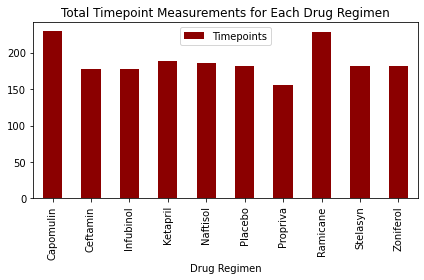

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#xaxis
drug_regimen = grouped_drugs['Timepoint'].count() 

#yaxis
drug_names = grouped_drugs['Drug Regimen'].unique() 

#create dataframe with values to graph 
bar_df = pd.DataFrame({"Timepoints": drug_regimen, "Drug Regimen": drug_names})

#create bar graph 
bar_graph = bar_df.plot.bar(color= "darkred",width=.5, alpha=1, align="center")

#add title 
plt.title("Total Timepoint Measurements for Each Drug Regimen")

#adjust graph layout 
plt.tight_layout()

#show graph 
plt.show()   

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#count timepoints for each drug regimen
drug_regimen = grouped_drugs['Timepoint'].count() 

# print to find values for yaxis
drug_regimen

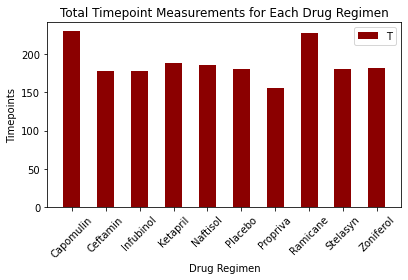

In [10]:
#yaxis
timepoints = [230,178,178,188,186,181,156,228,181,182]

#find names of drug regimens to create labels 
drug_names = grouped_drugs['Drug Regimen'].unique() 

#print to find labels for xaxis
drug_names

#xaxis
drugs = np.arange(len(drug_names))

#labels
labels = ['Capomulin', 'Ceftamin', 'Infubinol', "Ketapril", "Naftisol", 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#create xticks
plt.xticks(drugs, labels)

#rotate xticks to fit lables
plt.xticks(rotation = 45)

#add title 
plt.title("Total Timepoint Measurements for Each Drug Regimen")

#label xaxis
plt.xlabel("Drug Regimen")

#lable yaxis
plt.ylabel("Timepoints")

#adjust chart layout 
plt.tight_layout()

#make each drug a different color 
#c = ['darkred','red', 'orange', 'yellow','lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue']

#create bar chart 
plt.bar(drugs, timepoints, color= 'darkred',width=.5, alpha=1, align="center")

#create legend
plt.legend("Timepoints", loc='best')

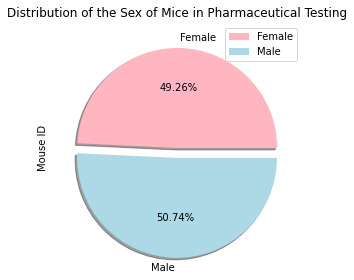

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Filter the DataFrame down only to those columns to chart
mice_sex = mouse_data_clean.groupby(["Sex"]).count()

#make the highest value stand out 
explode = (0, 0.1) 

# The colors of each section of the pie chart
colors = ["lightpink", "lightblue"] 

#create pie chart 
mouse_piechart = mice_sex.plot.pie(y='Mouse ID', figsize=(4, 4), explode=explode, shadow=True, colors=colors, autopct='%.2f%%')

# Set a title for the chart
plt.title("Distribution of the Sex of Mice in Pharmaceutical Testing")

#adjust chart layout 
plt.tight_layout()

#show chart 
plt.show()

Text(0.5, 1.0, 'Distribution of the Sex of Mice in Pharmaceutical Testing')

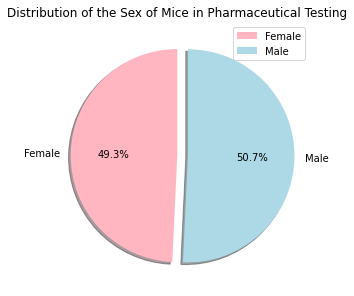

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

#count the number of female mice 
female = mouse_data_clean[mouse_data_clean["Sex"] == "Female"].count()

#print to find number of female mice 
female 

#count the number of male mice 
male = mouse_data_clean[mouse_data_clean["Sex"] == "Male"].count()

#print to find number of male mice 
male

# The values of each section of the pie chart
count = [930, 958] 

# The colors of each section of the pie chart
colors = ["lightpink", "lightblue"] 

# Tells matplotlib to separate the highest percent from the others
explode = (0, 0.1) 

#create pie chart
plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90) 

#add legend
plt.legend(loc="best")

#adjust chart layout 
plt.tight_layout()

#adds title to pie chart 
plt.title("Distribution of the Sex of Mice in Pharmaceutical Testing") 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#group by mouse ID
timepoint_groupby = mouse_data_clean.groupby(["Mouse ID"])

#find the max timepoint for the group
greatest_timepoint = timepoint_groupby["Timepoint"].max()

#print max timepoint 
greatest_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data_timepoint = pd.merge(mouse_data_clean, greatest_timepoint, how="left", on=["Mouse ID", "Mouse ID"])

#print merged dataset
mouse_data_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes for treatment in treatments: 
for treatment in treatments:
    drugs = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"] == treatment]
    tumor_vol= drugs['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)

#print list 

tumor_vol_data

[10      45.000000
 11      43.878496
 12      37.614948
 13      38.177232
 14      36.866876
           ...    
 440     47.685963
 1447    45.000000
 1448    45.597064
 1449    46.059608
 1450    46.539206
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 0      45.000000
 1      38.825898
 2      35.014271
 3      34.223992
 4      32.997729
          ...    
 449    43.166373
 450    45.000000
 451    45.877545
 452    46.378092
 453    44.183451
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 454     45.000000
 455     48.508468
 456     51.852437
 457     52.777870
 458     55.173336
           ...    
 1863    54.316407
 1864    56.286750
 1865    58.628399
 1866    60.053740
 1867    62.754451
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 484     45.000000
 485     46.795257
 486     47.371343
 487     49.734404
 488     50.513437
           ...    
 1846    57.173538
 1847    59.033275
 1848    61.153140
 1849    63.469549
 1850    64.729837
 Name: 

In [36]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#define lower quartile
quartile_cap = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq_cap = quartile_cap[0.25]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

quartile_ram = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq_ram = quartile_ram[0.25]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

quartile_inf = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq_inf= quartile_inf[0.25]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

quartile_cef = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq_cef= quartile_cef[0.25]
upperq_cef = quartile_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

# Determine outliers using upper and lower bounds
lower_bound_cap = lowerq_cap  - (1.5*iqr_cap)
upper_bound_cap = upperq_cap  + (1.5*iqr_cap)

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

print(f"For {treatments[0]}, values below {lower_bound_cap} and above {upper_bound_cap} could be outliers.")
print(f"For {treatments[1]}, values below {lower_bound_ram} and above {upper_bound_ram} could be outliers.")
print(f"For {treatments[2]}, values below {lower_bound_inf} and above {upper_bound_inf} could be outliers.")
print(f"For {treatments[3]}, values below {lower_bound_cef} and above {upper_bound_cef} could be outliers.")

For Capomulin, values below 26.714832162499995 and above 55.9711007025 could be outliers.
For Ramicane, values below 24.1865864625 and above 57.488048122500004 could be outliers.
For Infubinol, values below 32.309217298749985 and above 72.31757996875001 could be outliers.
For Ceftamin, values below 32.81891142624998 and above 71.19095325625001 could be outliers.


/var/folders/lf/_fj3_9ln3j5bmwl546qpzm1w0000gn/T/ipykernel_72251/3147516539.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


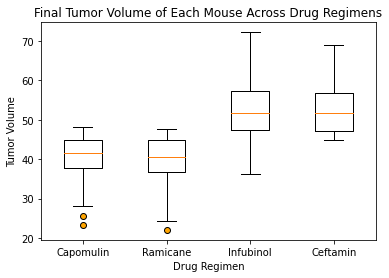

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#subplots
fig1, ax1 = plt.subplots()

#create xaxis label
ax1.set_xlabel('Drug Regimen')

#create yaxis label
ax1.set_ylabel('Tumor Volume')

#set xtick labels
ax1.set_xticklabels(treatments)

#set title
ax1.set_title('Final Tumor Volume of Each Mouse Across Drug Regimens')

#customize outliers on graph 
flierprops =dict(marker='o', markerfacecolor='orange', markersize=6,
                  linestyle='none')

#create graph 
ax1.boxplot(tumor_vol_data, flierprops = flierprops)

#show graph 
plt.show()

## Line and Scatter Plots

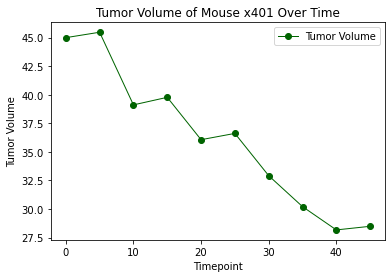

In [41]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin
#filter dataframe to find all the mice treated by Capomulin
capomulin = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == 'Capomulin']

#Find all of the mouse IDs for the mice treated by Capomulin
single_mouse = capomulin.value_counts("Mouse ID")

#print mice IDs to choose a single mouse 
single_mouse

#filter dataframe to by the chosen mouse treated by Capomulin
chosen_mouse = mouse_data_clean.loc[mouse_data_clean["Mouse ID"] == "x401"]

#x-axis 
timepoint = chosen_mouse["Timepoint"]

#y-axis
tumor_volume= chosen_mouse["Tumor Volume (mm3)"]

#create new dataframe to base graph on 
line_df = pd.DataFrame({"Timepoint": timepoint, "Tumor Volume": tumor_volume})

#plot the data in a line graph 
line_chart = line_df.plot(kind = 'line', x = "Timepoint", y = "Tumor Volume", marker="o", linewidth=1, color = "darkgreen")

#adjust xticks to fit the data better 
plt.xticks(np.arange(min(timepoint), max(timepoint), 10))

#set xlabel
line_chart.set_xlabel("Timepoint")

#set ylabel
line_chart.set_ylabel("Tumor Volume")

#set title
line_chart.set_title("Tumor Volume of Mouse x401 Over Time")

#show the graph
plt.show() 

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#filter dataframe to find all the mice treated by Capomulin
capomulin = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == 'Capomulin']

cap_group = capomulin.groupby(["Mouse ID"]).mean()

cap_group

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


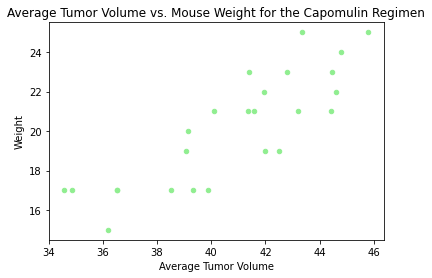

In [75]:
# #Find the weights for the mice treated by Capomulin
weight= cap_group["Weight (g)"]

#Find the average tumor volume for the mice treated by Capomulin
tumor_volume = cap_group["Tumor Volume (mm3)"]

#create new dataframe to base graph on 
scatter_df = pd.DataFrame({"Average Tumor Volume": tumor_volume, "Weight": weight})

#plot the data in a scatter plot graph 
scatter_chart = scatter_df.plot(kind = 'scatter', x = "Average Tumor Volume", y = "Weight", color = 'lightgreen')

#set xlabel
scatter_chart.set_xlabel("Average Tumor Volume")

#set ylabel
scatter_chart.set_ylabel("Weight")

#set title
scatter_chart.set_title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

#show graph
plt.show() 

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient
correlation = st.pearsonr(tumor_volume,weight)

#print correlation coefficient
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [77]:
# # Calculate the linear regression model 

# Perform a linear regression on tumor volume versus mosue weight
slope, intercept, rvalue, pvalue, stderr = linregress(tumor_volume, weight)

# Create equation of line to calculate predicted weights
regress_values = weight * slope + intercept


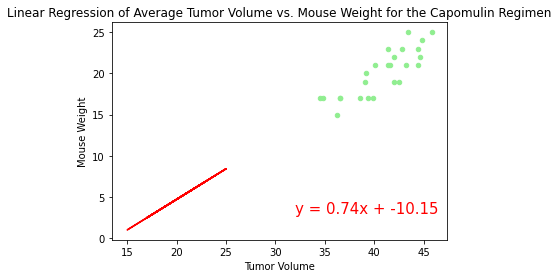

In [82]:
# Plot the linear model on top of scatter plot 
scatter_chart = scatter_df.plot(kind = 'scatter', x = "Average Tumor Volume", y = "Weight", color = 'lightgreen')

plt.plot(weight,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(32,3),fontsize=15,color="red")

#Create y label 
plt.ylabel('Mouse Weight')

#create x label
plt.xlabel('Tumor Volume')

#create title 
plt.title("Linear Regression of Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

#show graph 
plt.show()